<a href="https://colab.research.google.com/github/Codeadi01/RL/blob/main/RL_EXP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

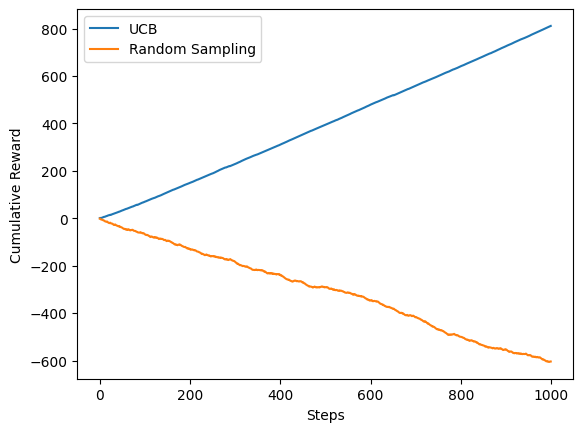

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the true rewards of each arm (slot machine)
def simulate_true_rewards(num_arms):
    return np.random.normal(0, 1, num_arms)

# UCB algorithm
def ucb(num_arms, num_steps):
    true_rewards = simulate_true_rewards(num_arms)
    estimated_means = np.zeros(num_arms)
    num_pulls = np.zeros(num_arms)

    total_rewards = 0
    cumulative_rewards = []

    for step in range(num_steps):
        arm_to_pull = np.argmax(estimated_means + np.sqrt(2 * np.log(step + 1) / (num_pulls + 1e-6)))
        reward = true_rewards[arm_to_pull] + np.random.normal(0, 0.1)  # Add some noise to the reward
        total_rewards += reward

        # Update estimates and counts
        num_pulls[arm_to_pull] += 1
        estimated_means[arm_to_pull] += (reward - estimated_means[arm_to_pull]) / num_pulls[arm_to_pull]

        cumulative_rewards.append(total_rewards)

    return cumulative_rewards

# Random sampling algorithm for comparison
def random_sampling(num_arms, num_steps):
    true_rewards = simulate_true_rewards(num_arms)

    total_rewards = 0
    cumulative_rewards = []

    for step in range(num_steps):
        arm_to_pull = np.random.choice(num_arms)
        reward = true_rewards[arm_to_pull] + np.random.normal(0, 0.1)
        total_rewards += reward

        cumulative_rewards.append(total_rewards)

    return cumulative_rewards

# Parameters
num_arms = 5
num_steps = 1000

# Run UCB algorithm
ucb_rewards = ucb(num_arms, num_steps)

# Run random sampling algorithm for comparison
random_rewards = random_sampling(num_arms, num_steps)

# Plot results
plt.plot(ucb_rewards, label='UCB')
plt.plot(random_rewards, label='Random Sampling')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()
